In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA(GPU)를 사용합니다.")
else:
    device = torch.device("cpu")
    print("CUDA(GPU)를 사용할 수 없으므로, CPU를 사용합니다.")

CUDA(GPU)를 사용할 수 없으므로, CPU를 사용합니다.


In [3]:
data = pd.read_csv(r'./dataset/styles.csv', on_bad_lines = 'skip')

In [4]:
data

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
...,...,...,...,...,...,...,...,...,...,...
44419,17036,Men,Footwear,Shoes,Casual Shoes,White,Summer,2013.0,Casual,Gas Men Caddy Casual Shoe
44420,6461,Men,Footwear,Flip Flops,Flip Flops,Red,Summer,2011.0,Casual,Lotto Men's Soccer Track Flip Flop
44421,18842,Men,Apparel,Topwear,Tshirts,Blue,Fall,2011.0,Casual,Puma Men Graphic Stellar Blue Tshirt
44422,46694,Women,Personal Care,Fragrance,Perfume and Body Mist,Blue,Spring,2017.0,Casual,Rasasi Women Blue Lady Perfume


In [10]:
df2 = data[data['subCategory'].isin(['Topwear', 'Shoes', 'Bags','Bottomwear', 'Watches', 'Innerwear', 'Eyewear', 'Wallets', 'Belts'])]

In [19]:
label_df = df2[['id','subCategory']]
label_df

,id,subCategory
0,15970,Topwear
1,39386,Bottomwear
2,59263,Watches
3,21379,Bottomwear
4,53759,Topwear
...,...,...
44417,12544,Topwear
44418,42234,Topwear
44419,17036,Shoes
44421,18842,Topwear


In [16]:
image_path = r'./dataset/images'

In [20]:
import os
import cv2
import numpy as np
import pandas as pd

def calculate_image_stats(image_folder, label_df):
    # label_df에서 id와 확장자를 합친 파일명 컬럼 생성
    label_df['filename'] = label_df['id'] + '.' + label_df['extension']

    # 이미지 폴더에서 jpg 파일만 선택
    image_files = [f for f in os.listdir(image_folder) if f.endswith('.jpg')]

    # label_df와 파일명을 비교하여 일치하는 파일만 선택
    matching_files = label_df[label_df['filename'].isin(image_files)]['filename'].tolist()

    # RGB 값 저장을 위한 리스트 초기화
    r_values = []
    g_values = []
    b_values = []

    # 선택된 이미지 파일에 대해 반복
    for filename in matching_files:
        # 이미지 읽기
        image_file = os.path.join(image_folder, filename)
        image = cv2.imread(image_file)

        # RGB로 변환
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # 각 채널에 대한 값 추출
        r, g, b = cv2.split(image_rgb)

        # RGB 값 리스트에 추가
        r_values.extend(r.flatten())
        g_values.extend(g.flatten())
        b_values.extend(b.flatten())

    # RGB 값의 평균과 표준 편차 계산
    r_mean = np.mean(r_values)
    g_mean = np.mean(g_values)
    b_mean = np.mean(b_values)
    r_std = np.std(r_values)
    g_std = np.std(g_values)
    b_std = np.std(b_values)

    return (r_mean, g_mean, b_mean), (r_std, g_std, b_std)

# 이미지 폴더 경로 설정
image_folder_path = "dataset/images"

# 레이블 데이터프레임 로드
# label_df = pd.read_csv("label_df.csv")  # id와 해당하는 파일명 및 확장자 정보를 포함한 데이터프레임

# 이미지 폴더에서 RGB 값의 평균과 표준 편차 계산
mean, std = calculate_image_stats(image_folder_path, label_df)

print("RGB 값의 평균:", mean)
print("RGB 값의 표준 편차:", std)


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int64'), dtype('<U1')) -> None

In [6]:
data.keys()

Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')

In [21]:
def plot_head_5_image(col):
    for category in data[col].unique():
        fig, axs = plt.subplots(1, 5, figsize = (15, 10))
        for i, ax in zip(data[data[col] == category]['id'][:5], axs.ravel()):
            jpg_path = f'{image_path}/{str(i)}.jpg'
            images = plt.imread(jpg_path)
            ax.imshow(images, cmap = 'gray')
            ax.set_title(f'{category}:{i}')
    plt.show()

In [22]:
use_cols = ['gender', 'season', 'usage', 'masterCategory', 'baseColour']

gender


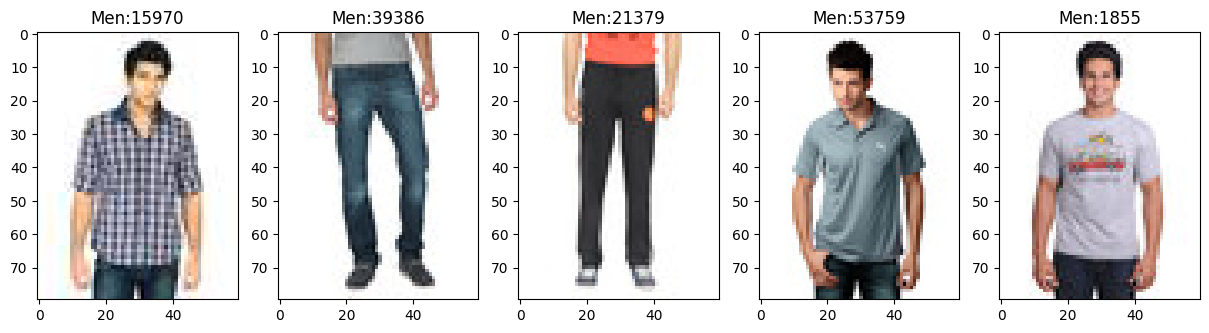

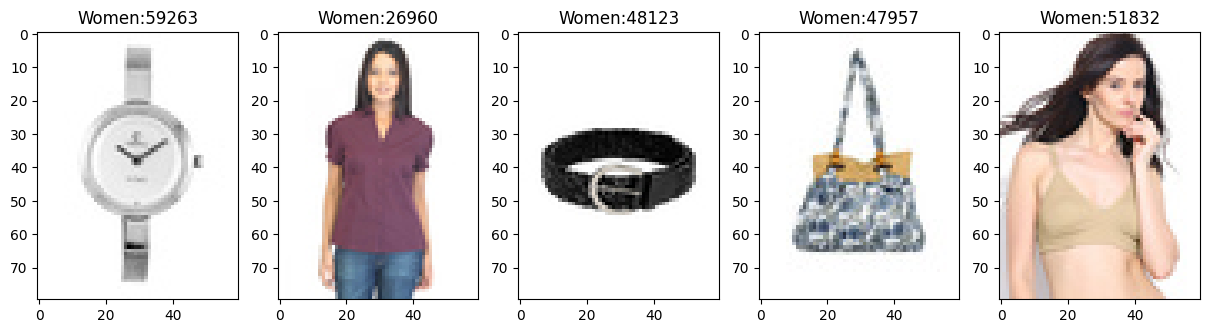

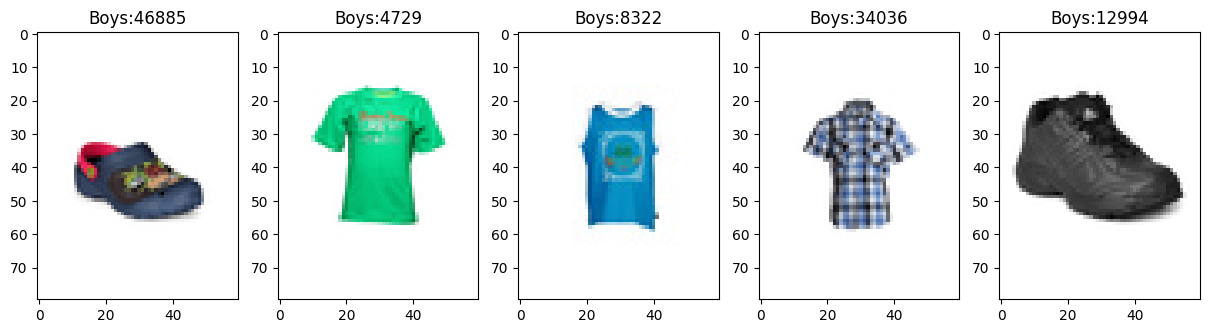

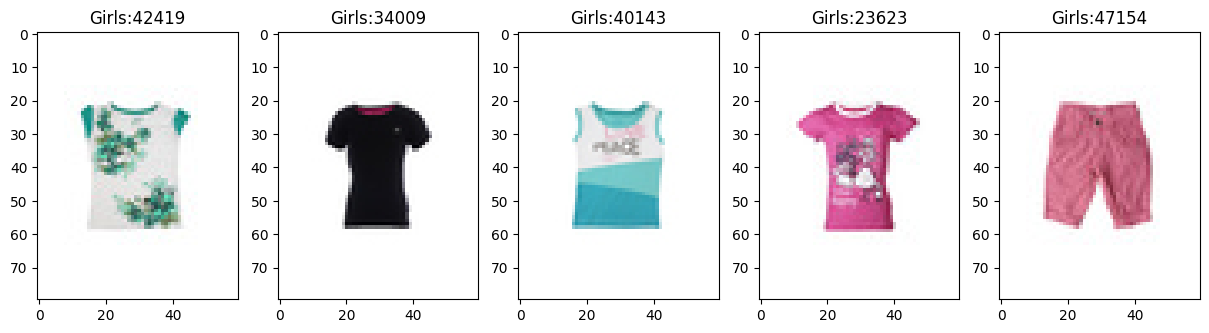

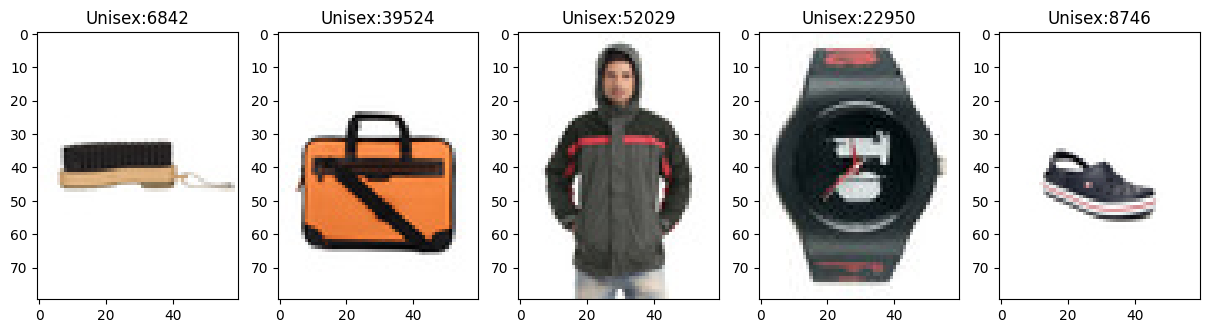

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
season


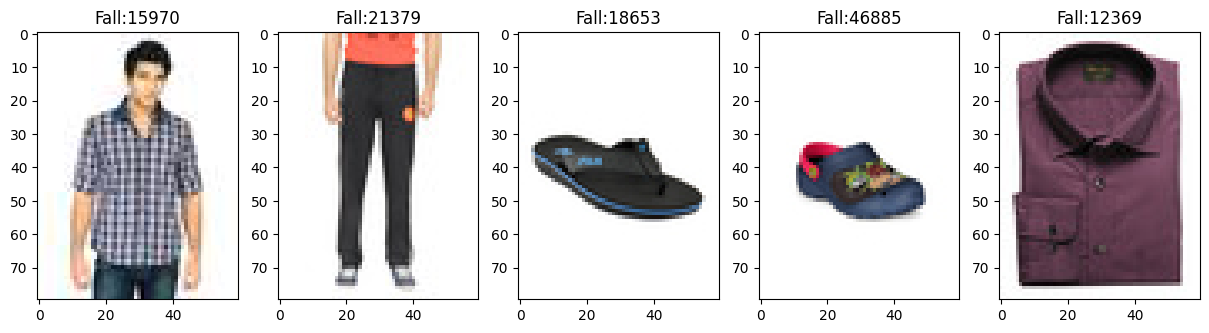

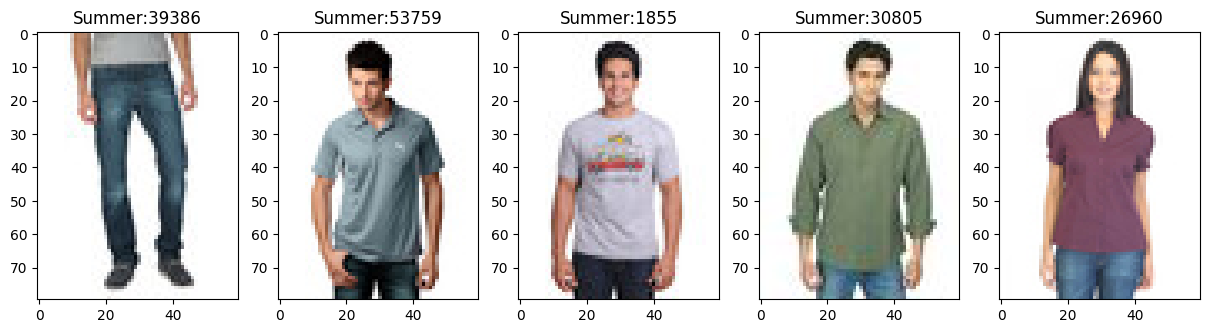

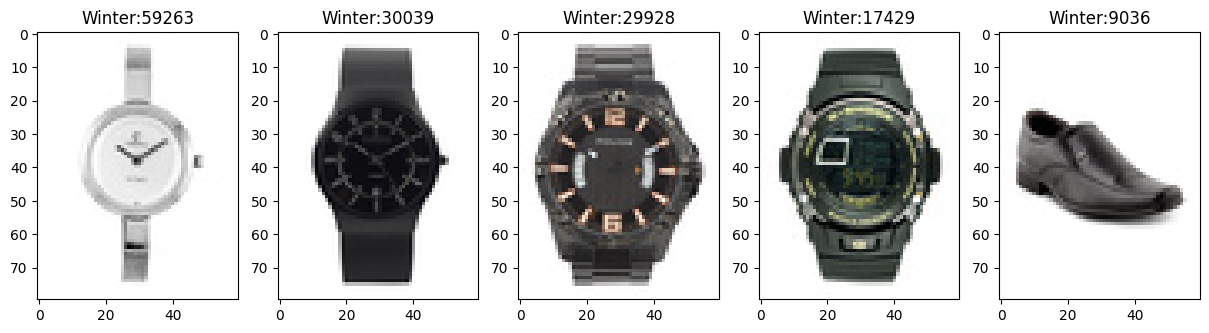

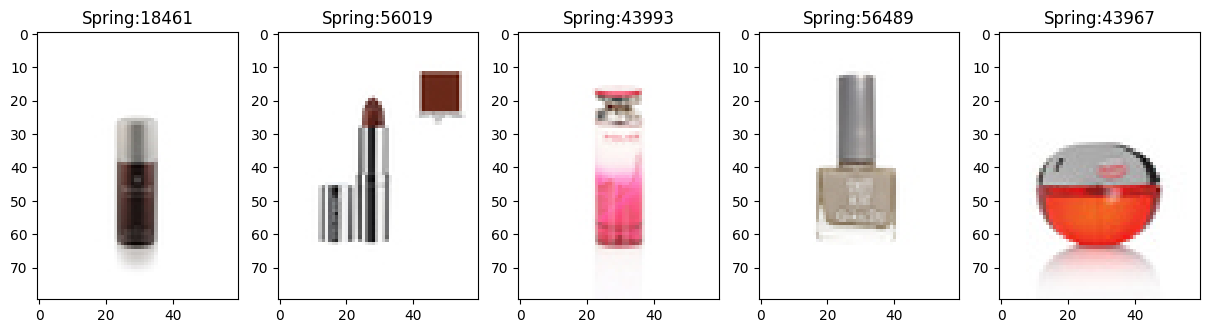

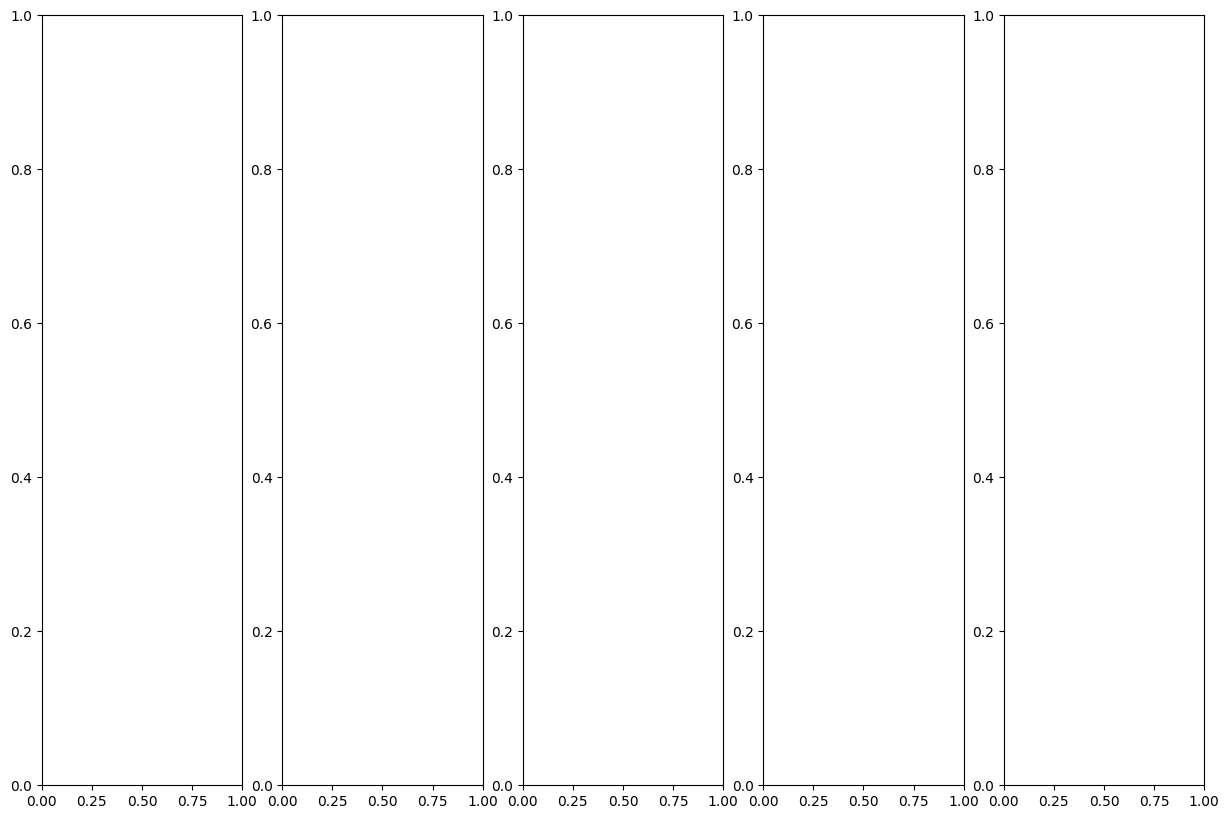

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
usage


KeyboardInterrupt: 

In [23]:
for col in use_cols:
    print(col)
    plot_head_5_image(col)
    print('-' * 300)

In [ ]:
import os
import cv2
import numpy as np

def calculate_image_stats(image_folder):
    # 리스트에 이미지 파일 경로 수집
    image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.jpg')]

    # RGB 값 저장을 위한 리스트 초기화
    r_values = []
    g_values = []
    b_values = []

    # 모든 이미지에 대해 반복
    for image_file in image_files:
        # 이미지 읽기
        image = cv2.imread(image_file)

        # RGB로 변환
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # 각 채널에 대한 값 추출
        r, g, b = cv2.split(image_rgb)

        # RGB 값 리스트에 추가
        r_values.extend(r.flatten())
        g_values.extend(g.flatten())
        b_values.extend(b.flatten())

    # RGB 값의 평균과 표준 편차 계산
    r_mean = np.mean(r_values)
    g_mean = np.mean(g_values)
    b_mean = np.mean(b_values)
    r_std = np.std(r_values)
    g_std = np.std(g_values)
    b_std = np.std(b_values)

    return (r_mean, g_mean, b_mean), (r_std, g_std, b_std)

# 이미지 폴더 경로 설정
image_folder_path = "dataset/images"

# 이미지 폴더에서 RGB 값의 평균과 표준 편차 계산
mean, std = calculate_image_stats(image_folder_path)

print("RGB 값의 평균:", mean)
print("RGB 값의 표준 편차:", std)


In [ ]:
class myResNet(nn.Module):
    def __init__(self):
        super(myResNet, self).__init__()
        # ResNet18 모델 로드
        self.resnet = models.resnet18(weights=None)
        # self.resnet = models.resnet50(pretrained=False)
        # 출력 레이어를 클래스 수에 맞게 조정
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_ftrs, 10)

    def forward(self, x):
        return self.resnet(x)

In [ ]:
# CIFAR10 데이터셋 로드 및 전처리
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.4913, 0.4821, 0.4465], [0.2470, 0.2434, 0.2615]) # 알려진 CIFAR10의 평균과 표준편차
])

train_dataset = datasets.CIFAR10('./CIFAR10', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10('./CIFAR10', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [ ]:
# 모델, 손실 함수, 최적화 알고리즘 설정
model = myResNet().to(device)
criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.5)
optimizer = optim.Adam(model.parameters(), lr=0.03)
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [ ]:
# 손실과 정확도를 저장하기 위한 리스트 초기화
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

In [ ]:
# 훈련 함수
def train(model, train_loader, optimizer, epoch):
    model.train()
    train_loss = 0
    correct = 0
    total = 0
    for data, target in train_loader:
        if torch.cuda.is_available():
            data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()

    # 예측값 계산(가장 높은 값을 가진 인덱스)
    _, predicted = torch.max(output.data, 1)
    total += target.size(0)
    # 올바르게 예측된 샘플의 수 업데이트
    correct += (predicted == target).sum().item()

    # 평균 훈련 손실 계산
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    print(f'Epoch {epoch}, Training loss: {train_loss:.4f}')
    accuracy = 100. * correct / total
    train_accuracies.append(accuracy)

In [ ]:
# 테스트 함수
def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            if torch.cuda.is_available():
                data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader)
    accuracy = 100. * correct / len(test_loader.dataset)
    test_losses.append(test_loss)
    test_accuracies.append(accuracy)
    print(f'Test loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%')

In [ ]:
# 훈련 및 테스트 실행
for epoch in range(1, 21):
    train(model, train_loader, optimizer, epoch)
    test(model, test_loader)

In [ ]:
import matplotlib.pyplot as plt

# 손실 및 정확도 시각화
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

axs[0].plot(train_losses, label='Training Loss')
axs[0].plot(test_losses, label='Test Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].set_title('Training and Test Loss')

axs[1].plot(train_accuracies, label='Training Accuracy', color='blue')
axs[1].plot(test_accuracies, label='Test Accuracy', color='orange')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy (%)')
axs[1].legend()
axs[1].set_title('Training and Test Accuracy')

plt.tight_layout()
plt.show()